In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [9]:
train_data = pd.read_csv('V:\\SC324-2412\\train.csv')
test_data  = pd.read_csv('V:\\SC324-2412\\test.csv')
submit_data  = pd.read_csv('V:\\SC324-2412\\gender_submission.csv')

In [10]:
train_data.shape

(891, 12)

In [12]:
train_data[['Name', 'Ticket']].describe()

Name  Ticket
count                       891     891
unique                      891     681
top     Braund, Mr. Owen Harris  347082
freq                          1       7

In [17]:
train_data[['Name', 'Ticket']].dtypes

Name      object
Ticket    object
dtype: object

In [28]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans

text = train_data['Name'].values.tolist()
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(text)
temp = vectorizer.get_feature_names_out()
kmeans = KMeans(n_clusters=9, random_state=0).fit_predict(X)

In [59]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

In [57]:
kmeans = KMeans(n_clusters=2, random_state=0).fit_predict(X)

In [58]:
true = train_data['Survived'].tolist()

In [56]:
np.mean(kmeans == true)

0.21099887766554434

In [61]:
tmp = []
for n_clusters in [2,3,4,5,6,7,8,9,10]:
    clusterer = KMeans(n_clusters=n_clusters, random_state=0)
    cluster_labels = clusterer.fit_predict(X)
    silhouette_avg = silhouette_score(X, cluster_labels)
    tmp.append(silhouette_avg)
    print("For n_clusters =", n_clusters, "The average silhouette_score is :", silhouette_avg)

For n_clusters = 2 The average silhouette_score is : 0.01232490092275775
For n_clusters = 3 The average silhouette_score is : 0.01574800671852419
For n_clusters = 4 The average silhouette_score is : 0.013800756542528696
For n_clusters = 5 The average silhouette_score is : 0.015754909028643873
For n_clusters = 6 The average silhouette_score is : 0.017786650367340857
For n_clusters = 7 The average silhouette_score is : 0.014418581810620206
For n_clusters = 8 The average silhouette_score is : 0.012572554098915906
For n_clusters = 9 The average silhouette_score is : 0.018456026179104478
For n_clusters = 10 The average silhouette_score is : 0.017345389743038155


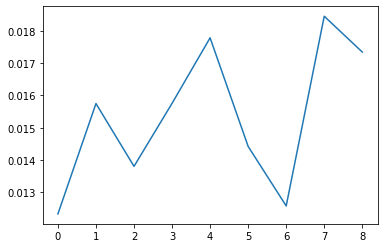

In [70]:
plt.plot(tmp)
#plt.xticks([2,3,4,5,6,7,8,9,10])
plt.show()

In [ ]:
#9 кластеров для признака name

In [78]:
text = train_data['Ticket'].tolist()
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(text)
temp = vectorizer.get_feature_names_out()
kmeans = KMeans(n_clusters=2, random_state=0).fit_predict(X)
true = train_data['Survived'].tolist()
np.mean(kmeans == true)

0.6363636363636364

In [93]:
ticket_type = []
for i in train_data['Ticket'].tolist():
    try:
        int(i)
        ticket_type.append(0)
    except:
        ticket_type.append(1)

In [95]:
np.mean(ticket_type == true)

0.0

In [96]:
np.mean(np.array(ticket_type) == np.array(true))

0.5555555555555556

In [ ]:
# признак 'ticket'  мы не используем